<a href="https://colab.research.google.com/github/bala-ceg/backtest-strategies/blob/main/weeklyexpiry_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install & Import Necessary Libs

In [ ]:
!pip install nsepython

In [2]:
from nsepython import *

## NIFTY OI sample snippet

In [170]:
symbol = "NIFTY"
start_date = "14-06-2024"
end_date ="19-06-2024"
instrumentType = "options"
expiry_date ="20-Jun-2024"
put_df = derivative_history(symbol,start_date,end_date,instrumentType,expiry_date,strikePrice="",optionType="PE")
call_df = derivative_history(symbol,start_date,end_date,instrumentType,expiry_date,strikePrice="",optionType="CE")
if not put_df.empty:
  put_df['FH_OPEN_INT'] = put_df['FH_OPEN_INT'].astype(int)
  put_df = put_df.sort_values(by=['FH_OPEN_INT'], ascending=False)
  underlying_value = put_df['FH_UNDERLYING_VALUE'].iloc[0]

if not call_df.empty:
  call_df['FH_OPEN_INT'] = call_df['FH_OPEN_INT'].astype(int)
  call_df = call_df.sort_values(by=['FH_OPEN_INT'], ascending=False)
  underlying_value = call_df['FH_UNDERLYING_VALUE'].iloc[0]

{'data': [{'_id': '6672e48f2b975143676c4fa3', 'FH_EXPIRY_DT': '20-Jun-2024', 'FH_INSTRUMENT': 'OPTIDX', 'FH_OPTION_TYPE': 'PE', 'FH_STRIKE_PRICE': '20150.00', 'FH_SYMBOL': 'NIFTY', 'TIMESTAMP': '2024-06-18T18:30:00.000Z', 'FH_CHANGE_IN_OI': '-109525.00', 'FH_CLOSING_PRICE': '0.45', 'FH_LAST_TRADED_PRICE': '0.40', 'FH_MARKET_LOT': '25', 'FH_MARKET_TYPE': 'N', 'FH_OPENING_PRICE': '0.60', 'FH_OPEN_INT': '2115750', 'FH_PREV_CLS': '0.55', 'FH_SETTLE_PRICE': '0.45', 'FH_TIMESTAMP': '19-Jun-2024', 'FH_TOT_TRADED_QTY': '8284725', 'FH_TOT_TRADED_VAL': '166940196098.75', 'FH_TRADE_HIGH_PRICE': '1.05', 'FH_TRADE_LOW_PRICE': '0.15', 'FH_UNDERLYING_VALUE': 23516, 'CALCULATED_PREMIUM_VAL': 2987348.75}, {'_id': '6672e48f2b975143676c781a', 'FH_EXPIRY_DT': '20-Jun-2024', 'FH_INSTRUMENT': 'OPTIDX', 'FH_OPTION_TYPE': 'PE', 'FH_STRIKE_PRICE': '20200.00', 'FH_SYMBOL': 'NIFTY', 'TIMESTAMP': '2024-06-18T18:30:00.000Z', 'FH_CHANGE_IN_OI': '34300.00', 'FH_CLOSING_PRICE': '0.50', 'FH_LAST_TRADED_PRICE': '0.40',

In [ ]:
put_total_open_int = put_df['FH_OPEN_INT'].sum()

put_df['FH_OPEN_INT_PERCENTAGE'] = (put_df['FH_OPEN_INT'] / put_total_open_int) * 100

put_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','FH_OPEN_INT_PERCENTAGE']].head(50)

In [172]:
put_df['FH_STRIKE_PRICE'] = put_df['FH_STRIKE_PRICE'].astype(float)
put_df['ABS_DIFF'] = abs(put_df['FH_STRIKE_PRICE'] - float(underlying_value))

# Sort by the absolute difference
sorted_put_df = put_df.sort_values(by='ABS_DIFF')

# Select the rows that are closest to the underlying value
closest_rows = sorted_put_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','ABS_DIFF','FH_OPEN_INT_PERCENTAGE']]

print(closest_rows.head(2))
print(underlying_value)
put_df['FH_OPEN_INT'].idxmax()
row_with_max_open_int = put_df.loc[put_df['FH_OPEN_INT'].idxmax()]
row_with_max_open_int['FH_OPEN_INT']

   FH_STRIKE_PRICE  FH_OPEN_INT  ABS_DIFF  FH_OPEN_INT_PERCENTAGE
2          23500.0      5314925      16.0                6.156575
1          23550.0      1860275      34.0                2.154861
23516


10236300

In [173]:
call_total_open_int = call_df['FH_OPEN_INT'].sum()

call_df['FH_OPEN_INT_PERCENTAGE'] = (call_df['FH_OPEN_INT'] / call_total_open_int) * 100

call_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','FH_OPEN_INT_PERCENTAGE']].head(50)


,FH_STRIKE_PRICE,FH_OPEN_INT,FH_OPEN_INT_PERCENTAGE
0,23600.00,5609600,28.052979
2,23500.00,5402700,27.018296
1,23550.00,2787450,13.939724
4,23400.00,2038875,10.196185
6,23300.00,1054825,5.275061
3,23450.00,874225,4.371901
12,23000.00,534150,2.671224
5,23350.00,509975,2.550328
8,23200.00,252750,1.263974
22,22500.00,196650,0.983425


In [174]:
call_df['FH_STRIKE_PRICE'] = call_df['FH_STRIKE_PRICE'].astype(float)
call_df['ABS_DIFF'] = abs(call_df['FH_STRIKE_PRICE'] - float(underlying_value))

# Sort by the absolute difference
sorted_call_df = call_df.sort_values(by='ABS_DIFF')

# Select the rows that are closest to the underlying value
closest_rows = sorted_call_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','ABS_DIFF','FH_OPEN_INT_PERCENTAGE']]

print(closest_rows.head(2))
print(underlying_value)
call_df['FH_OPEN_INT'].idxmax()
row_with_max_open_int = call_df.loc[call_df['FH_OPEN_INT'].idxmax()]
row_with_max_open_int['FH_OPEN_INT']

   FH_STRIKE_PRICE  FH_OPEN_INT  ABS_DIFF  FH_OPEN_INT_PERCENTAGE
2          23500.0      5402700      16.0               27.018296
1          23550.0      2787450      34.0               13.939724
23516


5609600

In [175]:
pcr = float(put_total_open_int/call_total_open_int)
pcr

4.31722880811344

In [167]:
call_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','ABS_DIFF','FH_OPEN_INT_PERCENTAGE']].head(15)

,FH_STRIKE_PRICE,FH_OPEN_INT,ABS_DIFF,FH_OPEN_INT_PERCENTAGE
16,24000.0,10893925,484.0,17.162396
19,23800.0,5842100,284.0,9.203701
20,23600.0,5609600,84.0,8.837419
22,23500.0,5402700,16.0,8.511466
17,23900.0,4961300,384.0,7.816080
4,25000.0,4492650,1484.0,7.077765
14,24100.0,3963500,584.0,6.244137
12,24200.0,3113400,684.0,4.904881
21,23550.0,2787450,34.0,4.391376
18,23850.0,2692250,334.0,4.241397


In [ ]:
call_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT']]

In [200]:
import pandas as pd
historic_nifty_df = pd.read_csv('/content/Nifty50_5Ydata.csv')
historic_nifty_df['Date'] = pd.to_datetime(historic_nifty_df['Date'], format="%d-%m-%Y")
numeric_columns = ["Open", "High", "Low", "Price"]
for column in numeric_columns:
    historic_nifty_df[column] = historic_nifty_df[column].str.replace(",", "").astype(float)
historic_nifty_df['Change %'] = historic_nifty_df['Change %'].str.replace("%", "").astype(float)
historic_nifty_df

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-06-20,23567.00,23586.15,23624.00,23442.60,280.34B,0.22
1,2024-06-19,23516.00,23629.85,23664.00,23412.90,328.81B,-0.18
2,2024-06-18,23557.90,23570.80,23579.05,23499.70,272.21B,0.39
3,2024-06-14,23465.60,23464.95,23490.40,23334.25,223.09B,0.29
4,2024-06-13,23398.90,23480.95,23481.05,23353.90,268.28B,0.33
...,...,...,...,...,...,...,...
1290,2019-04-04,11598.00,11660.20,11662.55,11559.20,349.03B,-0.39
1291,2019-04-03,11643.95,11735.30,11761.00,11629.15,365.76B,-0.59
1292,2019-04-02,11713.20,11711.55,11729.35,11655.85,386.13B,0.38
1293,2019-04-01,11669.15,11665.20,11738.10,11644.75,379.57B,0.39


In [201]:
data = historic_nifty_df.copy()
data['Day_of_Week'] = data['Date'].dt.dayofweek
data = data[['Date', 'Price', 'Day_of_Week','Change %']]
data['Week_Number'] = data['Date'].dt.isocalendar().week
data['Year'] = data['Date'].dt.isocalendar().year

day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'}
data['Day_of_Week'] = data['Day_of_Week'].map(day_map)

pivoted_data_1 = data.pivot_table(index=['Year', 'Week_Number'], columns='Day_of_Week', values='Price')
pivoted_data_2 = data.pivot_table(index=['Year', 'Week_Number'], columns='Day_of_Week', values='Change %')

In [203]:
pivoted_data_1.columns.name = None
pivoted_data_1.reset_index(inplace=True)


pivoted_data_2.columns.name = None
pivoted_data_2.reset_index(inplace=True)

pivoted_data_1['Friday'] = pivoted_data_1['Friday'].shift(1)

pivoted_data_1 = pivoted_data_1[['Year', 'Week_Number', 'Friday', 'Monday', 'Tuesday',  'Wednesday','Thursday']]
pivoted_data_1 = pivoted_data_1.dropna(thresh=pivoted_data_1.shape[1] - 5 + 1)
pivoted_data_1['Thursday'].fillna(pivoted_data_1['Wednesday'], inplace=True)

pivoted_data_2['Friday'] = pivoted_data_2['Friday'].shift(1)

pivoted_data_2 = pivoted_data_2[['Year', 'Week_Number', 'Friday', 'Monday', 'Tuesday',  'Wednesday','Thursday']]
pivoted_data_2 = pivoted_data_2.dropna(thresh=pivoted_data_2.shape[1] - 5 + 1)
pivoted_data_2['Thursday'].fillna(pivoted_data_2['Wednesday'], inplace=True)

In [204]:
len(pivoted_data_1)

273

In [205]:
pivoted_data_1

,Year,Week_Number,Friday,Monday,Tuesday,Wednesday,Thursday
0,2019,14,NaN,11669.15,11713.20,11643.95,11598.00
1,2019,15,11623.90,11604.50,11671.95,11584.30,11596.70
2,2019,16,11665.95,11690.35,11787.15,NaN,11752.80
3,2019,17,11643.45,11594.45,11575.95,11726.15,11641.80
4,2019,18,NaN,NaN,11748.15,NaN,11724.75
...,...,...,...,...,...,...,...
268,2024,21,22055.20,NaN,22529.05,22597.80,22967.65
269,2024,22,22466.10,22932.45,22888.15,22704.70,22488.65
270,2024,23,22957.10,23263.90,21884.50,22620.35,22821.40
271,2024,24,22530.70,23259.20,23264.85,23322.95,23398.90


In [210]:
pivoted_data_2['Year_Week'] = pivoted_data_2['Year'].astype(str) + '_' + pivoted_data_2['Week_Number'].astype(str)
pivoted_data_3 = pivoted_data_2[['Year_Week', 'Thursday']]
pivoted_data_3

,Year_Week,Thursday
0,2019_14,-0.39
1,2019_15,0.11
2,2019_16,-0.29
3,2019_17,-0.72
4,2019_18,-0.20
...,...,...
268,2024_21,1.64
269,2024_22,-0.95
270,2024_23,0.89
271,2024_24,0.33


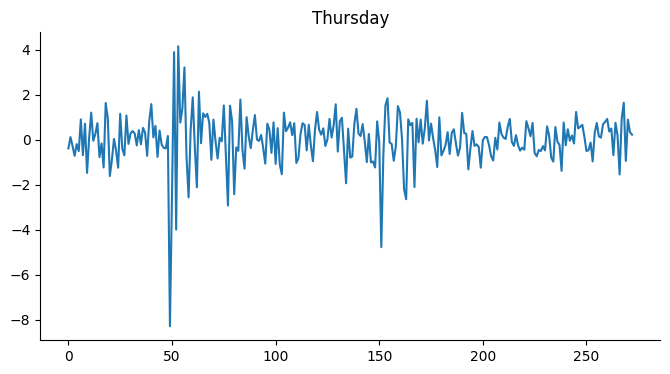

In [212]:
# @title Thursday

from matplotlib import pyplot as plt
pivoted_data_3['Thursday'].plot(kind='line', figsize=(8, 4), title='Thursday')
plt.gca().spines[['top', 'right']].set_visible(False)